# 2 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load The Data](#2.4_Load_The_Data)
    * [2.4.1 Listing Price](#2.4.1_Listing_Price)

## 2.2 Introduction<a id='2.2_Introduction'></a>

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from sklearn.preprocessing import scale
from scipy.stats import skew, norm
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from scipy import stats
from datetime import date

## 2.4 Load The Data<a id='2.4_Load_The_Data'></a>

In [2]:
SingleFamilyHome = pd.read_csv('../data/processed/SingleFamily.csv')

In [3]:
SingleFamilyHome.head()

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
0,['https://photos.harstatic.com/189115929/hr/im...,364990,1735 Eado Point Lane,Houston,77003,Harris County,LT 17 BLK 2 EADO POINT,3,3.0,Contemporary/Modern,...,2018,1485,217000.0,192.51,2169.0,2.6554,430.0,3,1,1195.0
1,['https://photos.harstatic.com/188179029/hr/im...,419000,619 Live Oak Street,Houston,77003,Harris County,LT 7 BLK 1 CAPITOL OAKS SEC 3 RP NO 1,3,3.0,Traditional,...,2012,1563,443500.0,200.05,10366.0,2.5466,320.0,3,1,2244.0
2,['https://photos.harstatic.com/189527871/hr/im...,298800,1417 Hussion Street,Houston,77003,Harris County,LT 7 BLK 1 W L EDMUNDSON SEC 3,3,1.0,Traditional,...,1929,5000,126500.0,147.06,5854.0,2.5716,616.0,1,1,0.0
3,['https://photos.harstatic.com/189915458/hr/im...,289900,1737 Aden Drive,Houston,77003,Harris County,"Lot 59, Block 1",2,2.0,Other,...,2005,1904,259000.0,181.62,6685.4,2.5465,330.0,2,0,1500.0
4,['https://photos.harstatic.com/190529396/hr/im...,284900,1773 Aden Drive,Houston,77003,Harris County,LT 90 BLK 1 MIDTOWN VILLAGE,2,2.0,Traditional,...,2005,1904,259000.0,181.62,6299.0,2.5466,282.0,2,1,1400.0


In [4]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6396 non-null   object 
 1   ListingPrice         6396 non-null   int64  
 2   Address              6396 non-null   object 
 3   City                 6396 non-null   object 
 4   ZipCode              6396 non-null   int64  
 5   County               6396 non-null   object 
 6   Legal                6396 non-null   object 
 7   NoBed                6396 non-null   int64  
 8   Stories              6396 non-null   float64
 9   Style                6396 non-null   object 
 10  YearBuilt            6396 non-null   int64  
 11  BuildSqft            6396 non-null   int64  
 12  LotSize              6396 non-null   float64
 13  Fireplace            6396 non-null   int64  
 14  Heating              6396 non-null   object 
 15  Cooling              6396 non-null   o

In [5]:
SingleFamilyHome.shape

(6396, 56)

There are some features with Yes and No category lets transfer them to 1 and 0 which 1 is Yes and 0 for No.

In [6]:
SingleFamilyHome = SingleFamilyHome.replace(to_replace = ['Yes','No'],value = [1,0])

In [7]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6396 non-null   object 
 1   ListingPrice         6396 non-null   int64  
 2   Address              6396 non-null   object 
 3   City                 6396 non-null   object 
 4   ZipCode              6396 non-null   int64  
 5   County               6396 non-null   object 
 6   Legal                6396 non-null   object 
 7   NoBed                6396 non-null   int64  
 8   Stories              6396 non-null   float64
 9   Style                6396 non-null   object 
 10  YearBuilt            6396 non-null   int64  
 11  BuildSqft            6396 non-null   int64  
 12  LotSize              6396 non-null   float64
 13  Fireplace            6396 non-null   int64  
 14  Heating              6396 non-null   object 
 15  Cooling              6396 non-null   o

Zip code should be categorical not int64

In [8]:
SingleFamilyHome.ZipCode = SingleFamilyHome.ZipCode.astype('object',copy=False)

In [9]:
SingleFamilyHome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image_link           6396 non-null   object 
 1   ListingPrice         6396 non-null   int64  
 2   Address              6396 non-null   object 
 3   City                 6396 non-null   object 
 4   ZipCode              6396 non-null   object 
 5   County               6396 non-null   object 
 6   Legal                6396 non-null   object 
 7   NoBed                6396 non-null   int64  
 8   Stories              6396 non-null   float64
 9   Style                6396 non-null   object 
 10  YearBuilt            6396 non-null   int64  
 11  BuildSqft            6396 non-null   int64  
 12  LotSize              6396 non-null   float64
 13  Fireplace            6396 non-null   int64  
 14  Heating              6396 non-null   object 
 15  Cooling              6396 non-null   o

In [10]:
categorical=[]
numerical=[]
for i in range(SingleFamilyHome.columns.size):
    if SingleFamilyHome.iloc[:,i].dtype=="object":
        categorical.append(SingleFamilyHome.columns[i])
    else:
        numerical.append(SingleFamilyHome.columns[i])

## 2.5 Numerical Variables<a id='2.5_Numerical_Variables'></a>

First lets look at numerical variables to see what are their statistics summary, correlation and their distribution

### 2.5.1 Listing Price<a id='2.4.1_Listing_Price'></a>

In [11]:
SingleFamilyHome.ListingPrice.describe()

count    6.396000e+03
mean     5.138098e+05
std      6.349354e+05
min      4.700000e+04
25%      2.350000e+05
50%      3.377500e+05
75%      5.500000e+05
max      1.450000e+07
Name: ListingPrice, dtype: float64

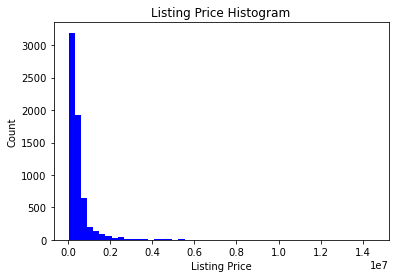

In [12]:
plt.hist(SingleFamilyHome.ListingPrice,bins=50, color='blue')
plt.xlabel('Listing Price')
plt.ylabel('Count')
plt.title('Listing Price Histogram')

plt.show()

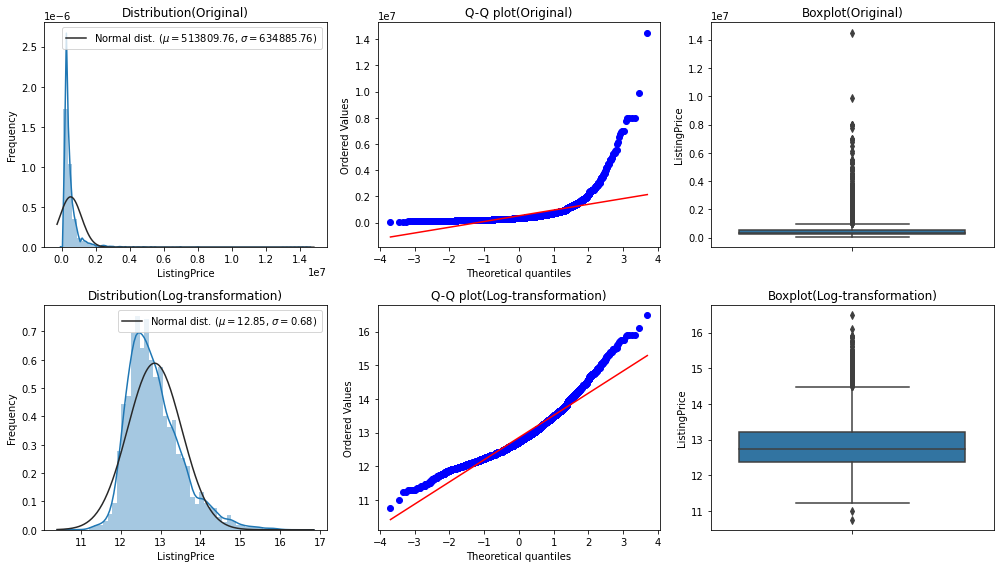

In [13]:
fig, ax = plt.subplots(2,3, figsize=(14,8))
##### Original
# histgram
sns.distplot(SingleFamilyHome['ListingPrice'] , fit=norm, ax=ax[0,0])
mu, sigma = norm.fit(SingleFamilyHome['ListingPrice'])
ax[0,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[0,0].set_ylabel('Frequency')
ax[0,0].set_title('Distribution(Original)')
# Q-Q plot
_ = stats.probplot(SingleFamilyHome['ListingPrice'], plot=ax[0,1])
ax[0,1].set_title('Q-Q plot(Original)')
# plot boxplot
sns.boxplot(SingleFamilyHome['ListingPrice'] , orient='v', ax=ax[0,2])
ax[0,2].set_title('Boxplot(Original)')

##### Log-transformation
logged = np.log1p(SingleFamilyHome['ListingPrice'])
# histgram
sns.distplot(logged , fit=norm, ax=ax[1,0])
mu, sigma = norm.fit(logged)
ax[1,0].legend([f'Normal dist. ($\mu=${mu:.2f}, $\sigma=${sigma:.2f})'], loc='best')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_title('Distribution(Log-transformation)')
# Q-Q plot
_ = stats.probplot(logged, plot=ax[1,1])
ax[1,1].set_title('Q-Q plot(Log-transformation)')
# plot boxplot
sns.boxplot(logged , orient='v', ax=ax[1,2])
ax[1,2].set_title('Boxplot(Log-transformation)')

fig.tight_layout()

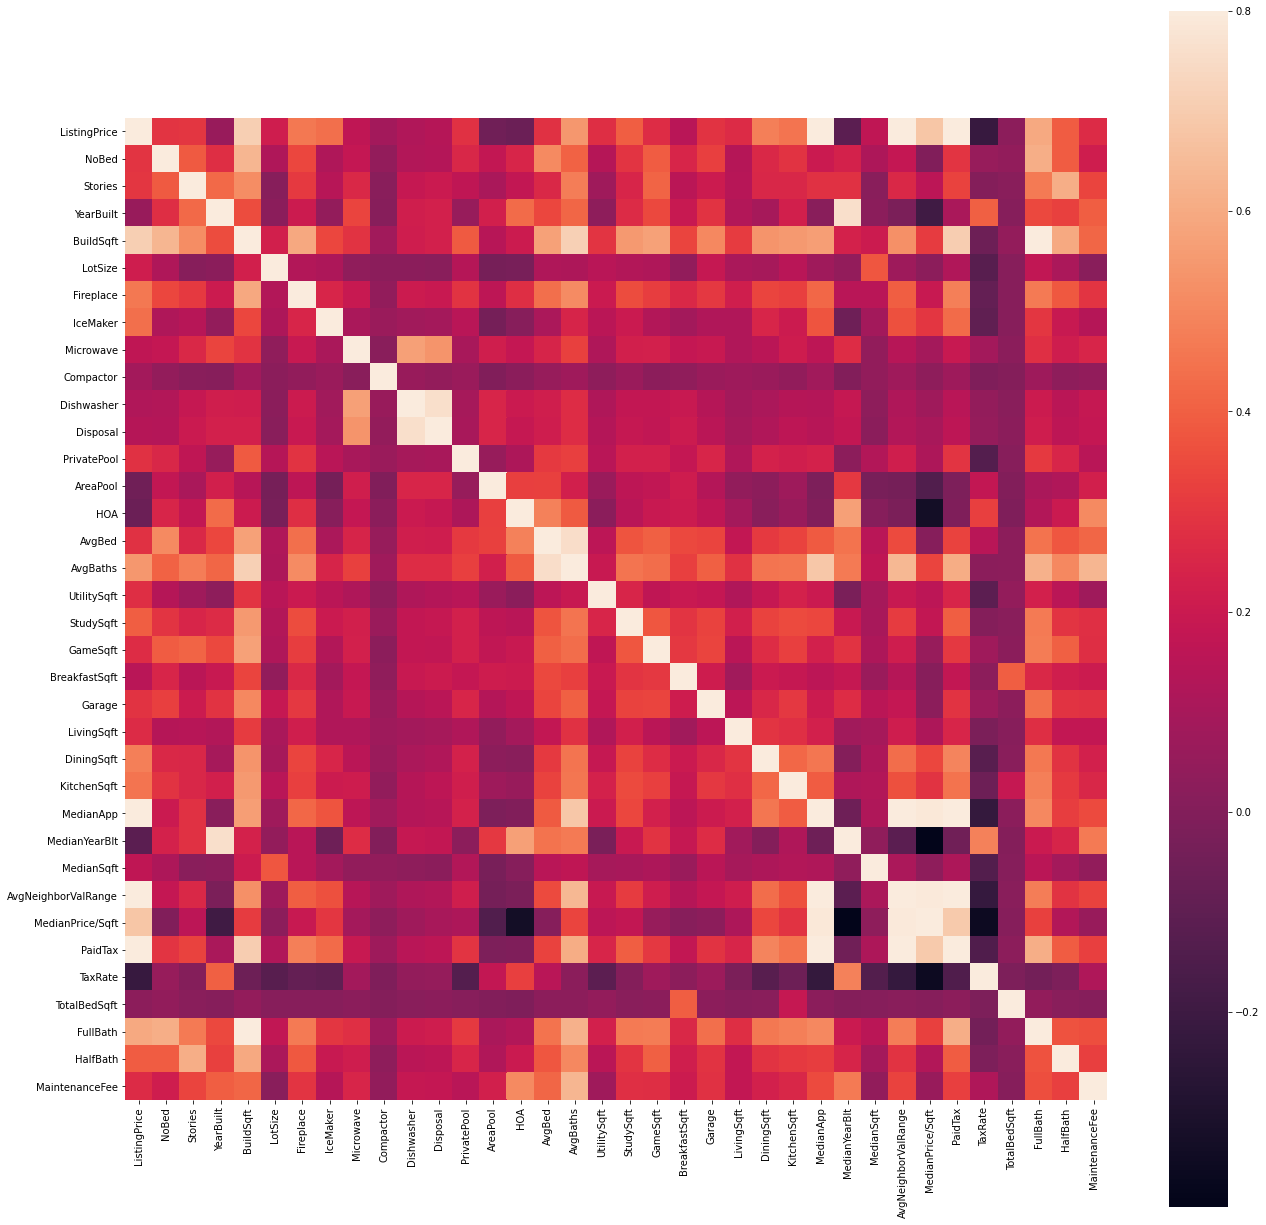

In [14]:
corr = SingleFamilyHome.select_dtypes(include=['float64', 'int64']).iloc[:,0:].corr()
f, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(corr, vmax=.8, square=True)

In [15]:
# Correlation between attributes with SalePrice
corr_list = corr['ListingPrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

PaidTax                0.908277
MedianApp              0.822519
AvgNeighborValRange    0.801646
BuildSqft              0.707130
MedianPrice/Sqft       0.683207
FullBath               0.598853
AvgBaths               0.545097
DiningSqft             0.479260
Fireplace              0.459734
KitchenSqft            0.451520
IceMaker               0.437515
StudySqft              0.398488
HalfBath               0.390750
Stories                0.297078
NoBed                  0.293513
Garage                 0.287021
AvgBed                 0.285906
PrivatePool            0.283686
UtilitySqft            0.276417
GameSqft               0.271460
LivingSqft             0.267688
MaintenanceFee         0.263762
LotSize                0.214975
MedianSqft             0.169931
Microwave              0.166151
BreakfastSqft          0.149433
Disposal               0.139917
Dishwasher             0.124999
Compactor              0.086215
YearBuilt              0.058764
TotalBedSqft           0.029910
AreaPool

Listing price is highly correlated to Median appraisal followed by neighborhood max and min range. 

In [16]:
high_correlated_features = ['MedianApp','AvgNeighborValRange','MedianPrice/Sqft','PaidTax',
                            'FullBath','BuildSqft','AvgBaths']

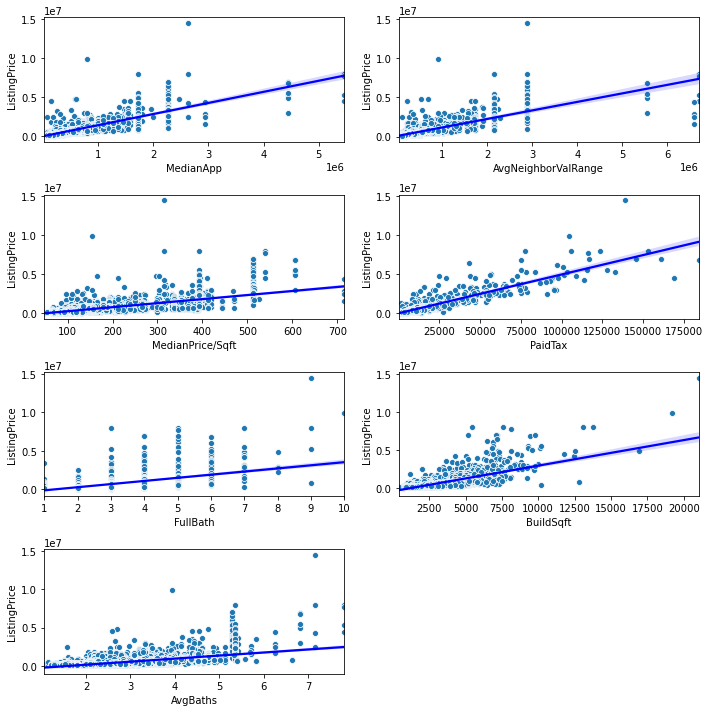

In [17]:
'''Plot appropriate graphs to comprehend the relationship'''
fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=4)
for i , var in enumerate(high_correlated_features):
    ax_i = fig.add_subplot(spec[i])
    sns.scatterplot(x=var, y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
    sns.regplot(x=var, y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')
    ax_i=plt.gca()
plt.tight_layout()
plt.show()


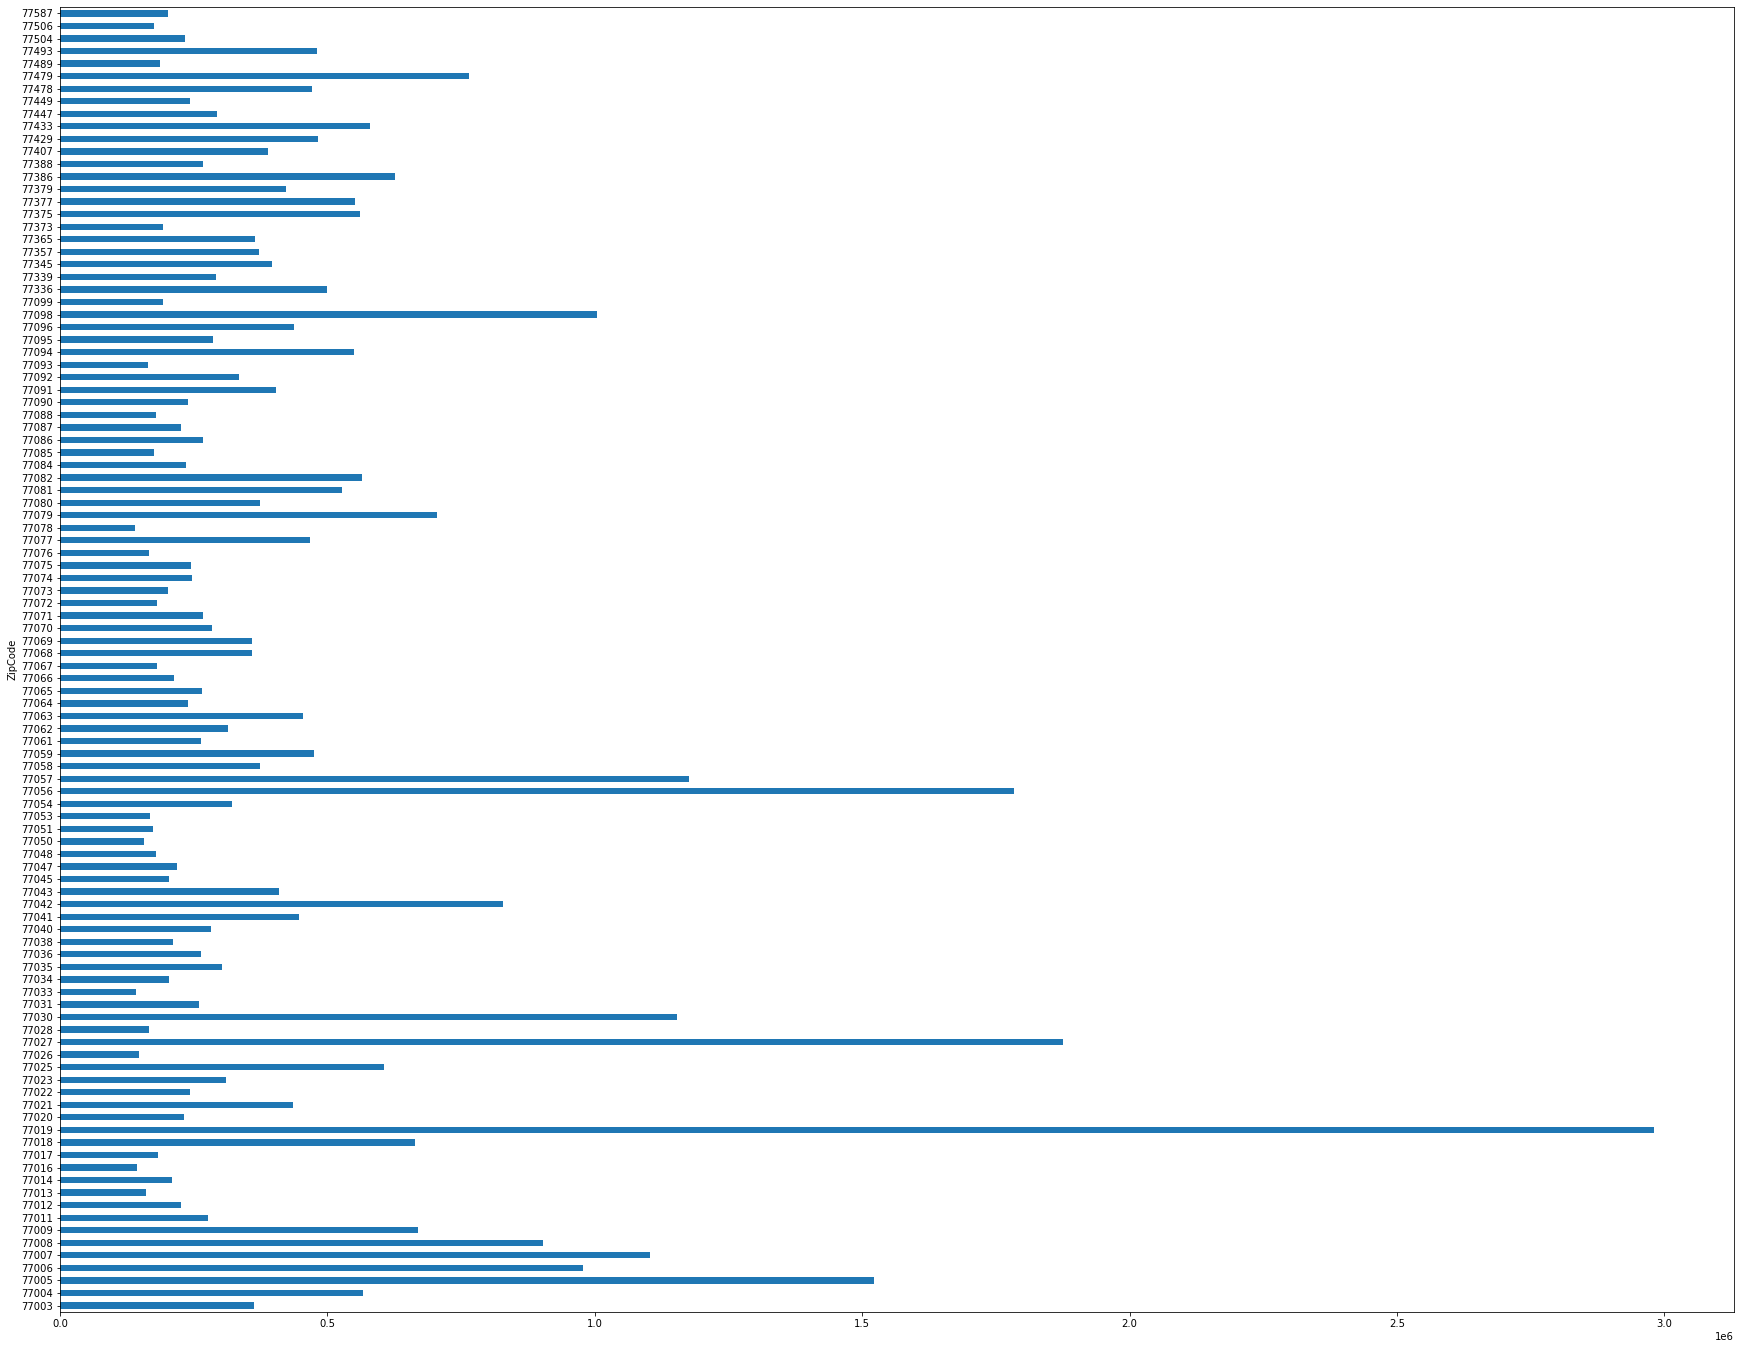

In [18]:
plt.figure(figsize=(30,24))
SingleFamilyHome.groupby('ZipCode')['ListingPrice'].mean().plot(kind='barh')

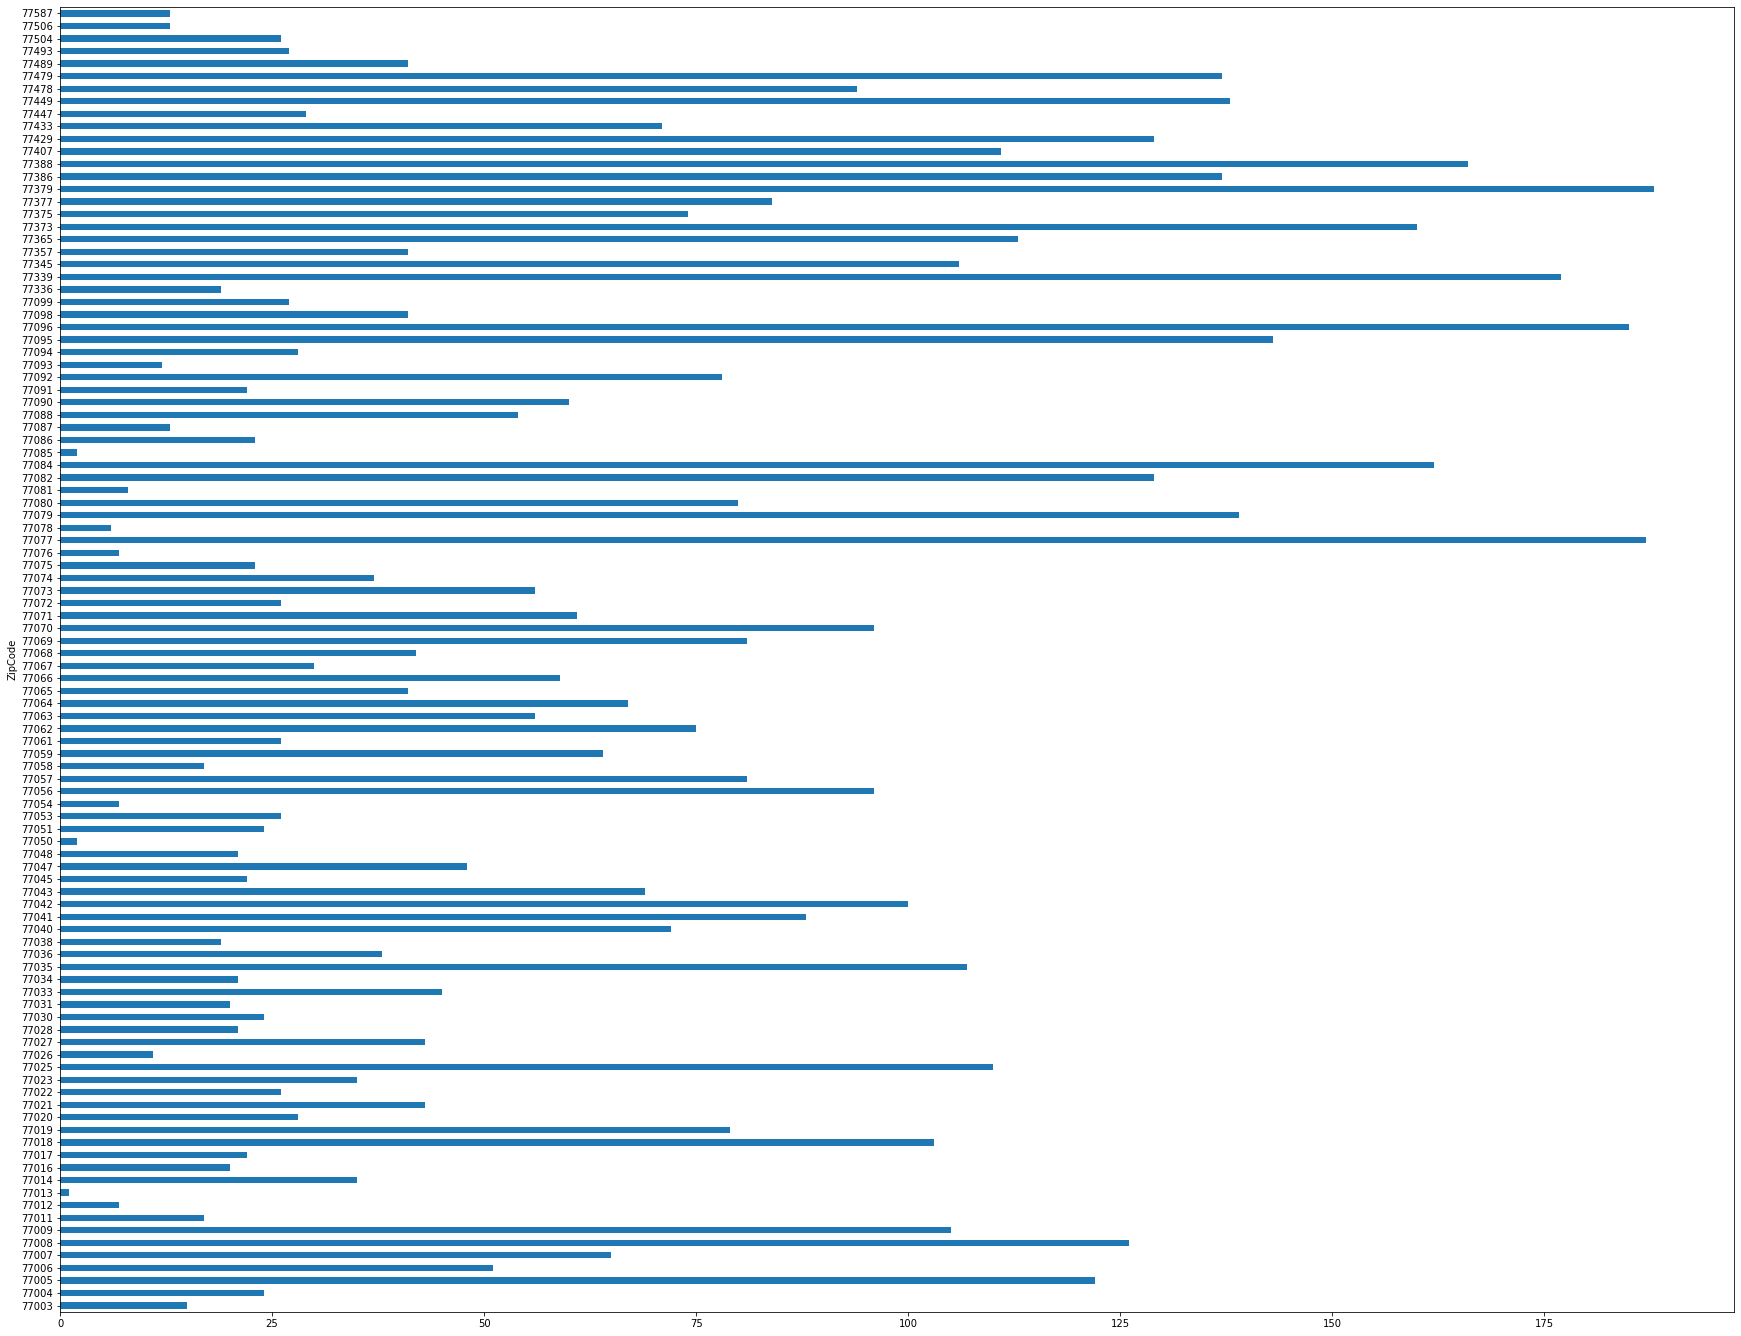

In [19]:
plt.figure(figsize=(30,24))
SingleFamilyHome.groupby('ZipCode')['ListingPrice'].count().plot(kind='barh')

Zip code 77019 has highest average price which includes one of the most expensive are in TX called `River Oak`.

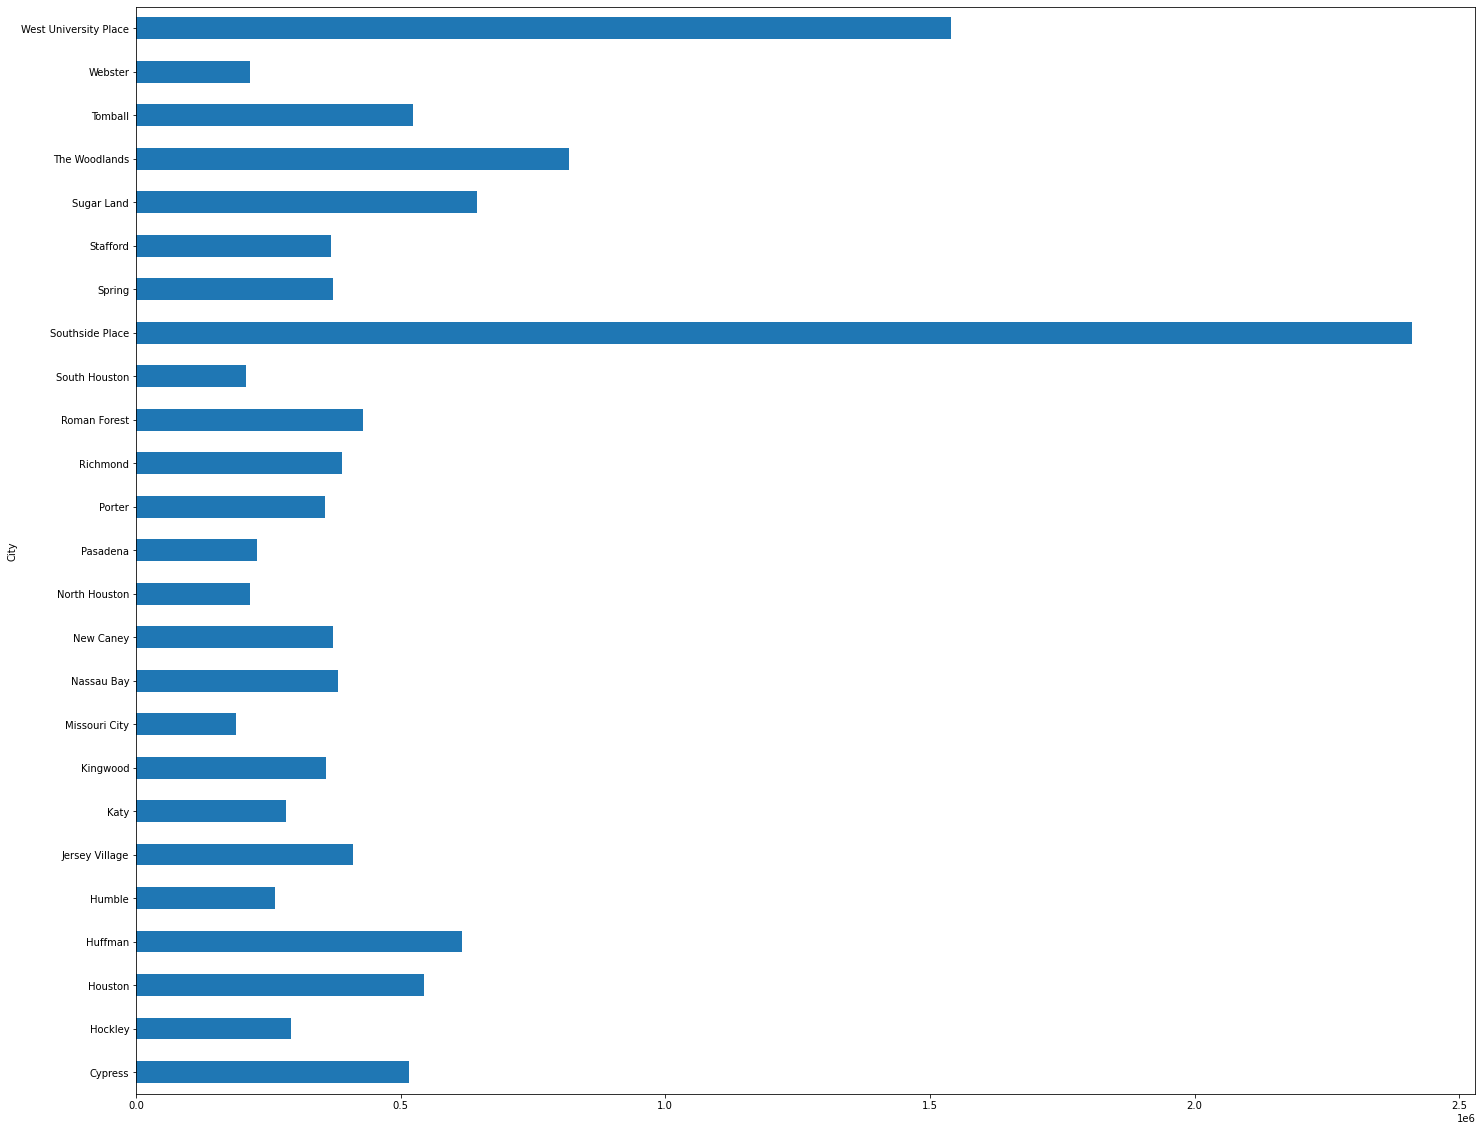

In [20]:
plt.figure(figsize=(24,20))
SingleFamilyHome.groupby('City')['ListingPrice'].mean().plot(kind='barh')

Surprisingly price average for houses in southside place is higher than other cities. lets take a look at these area:

In [21]:
SingleFamilyHome[SingleFamilyHome.City == 'Southside Place']

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
65,['https://photos.harstatic.com/189052667/hr/im...,1895000,3775 Elmora Street,Southside Place,77005,Harris County,LT 40 BLK 5 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992,7750,1642500.0,410.13,35411.00,2.1724,784.0,4,1,0.0
68,['https://photos.harstatic.com/190418429/hr/im...,1799000,6357 Edloe Street,Southside Place,77005,Harris County,LT 40 & TR 41A BLK 1 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992,7750,1642500.0,410.13,33164.00,2.1724,826.0,3,1,0.0
79,['https://photos.harstatic.com/191471051/hr/im...,1398000,3743 Carlon Street,Southside Place,77005,Harris County,LT 32 BLK 3 SOUTHSIDE PLACE,4,2.0,Traditional,...,1992,7750,1642500.0,410.13,30898.00,2.1724,737.0,2,1,0.0
98,['https://photos.harstatic.com/189115448/hr/im...,4549000,3745 Farber Street,Southside Place,77005,Harris County,LT 22 BLK 6 SOUTHSIDE PLACE,5,2.0,Traditional,...,1992,7750,1642500.0,410.13,29409.75,2.1724,1031.0,6,3,0.0


There are 4 houses with the price more than \\$1.5 million. 

In [22]:
SingleFamilyHome.groupby('City')['ListingPrice'].count()

City
Cypress                   201
Hockley                    28
Houston                  4378
Huffman                    13
Humble                      4
Jersey Village             18
Katy                      164
Kingwood                  139
Missouri City              29
Nassau Bay                 10
New Caney                  40
North Houston               2
Pasadena                   44
Porter                    105
Richmond                  111
Roman Forest                1
South Houston              12
Southside Place             4
Spring                    652
Stafford                    1
Sugar Land                231
The Woodlands              14
Tomball                   143
Webster                     2
West University Place      50
Name: ListingPrice, dtype: int64

In [23]:
SingleFamilyHome.groupby('SubName')['ListingPrice'].count().sort_values()

SubName
Young Mens                  1
Crestmont (Harris)          1
Croyden Gardens             1
South Acres (Houston)       1
Cypress Mill Estates        1
                           ..
Royal Oaks Country Club    74
Houston Heights Annex      78
Staffordshire Manors       83
Westbury South             85
Oak Forest ( West )        85
Name: ListingPrice, Length: 926, dtype: int64

In [24]:
np.sum(SingleFamilyHome.groupby('SubName')['ListingPrice'].count() ==1)

120

In [25]:
SingleFamilyHome.describe()

,ListingPrice,NoBed,Stories,YearBuilt,BuildSqft,LotSize,Fireplace,IceMaker,Microwave,Compactor,...,MedianYearBlt,MedianSqft,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee
count,6.396000e+03,6396.000000,6396.000000,6396.000000,6396.000000,6.396000e+03,6396.000000,6396.000000,6396.000000,6396.000000,...,6396.000000,6396.000000,6.396000e+03,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000,6396.000000
mean,5.138098e+05,3.728424,1.604206,1985.769856,2827.742339,1.133627e+04,0.840525,0.050813,0.703565,0.023139,...,1982.342558,9760.461538,4.021957e+05,148.896283,10522.557141,2.630972,718.371764,2.551595,0.641964,591.617104
std,6.349354e+05,0.814765,0.573291,24.014816,1335.008648,2.818252e+04,0.666797,0.219633,0.456721,0.150358,...,23.313791,16679.450793,4.674823e+05,83.501452,11545.217130,0.301609,3500.662506,0.935778,0.608012,673.815623
min,4.700000e+04,1.000000,1.000000,1875.000000,400.000000,1.104000e+03,0.000000,0.000000,0.000000,0.000000,...,1902.000000,1375.000000,3.550000e+04,48.120000,284.000000,0.610000,3.000000,1.000000,0.000000,0.000000
25%,2.350000e+05,3.000000,1.000000,1969.000000,1936.000000,6.448000e+03,0.000000,0.000000,0.000000,0.000000,...,1965.000000,6600.000000,1.845000e+05,97.340000,5058.500000,2.421600,486.395833,2.000000,0.000000,0.000000
50%,3.377500e+05,4.000000,2.000000,1988.000000,2552.000000,8.160000e+03,1.000000,0.000000,1.000000,0.000000,...,1982.000000,7931.000000,2.770000e+05,116.470000,7512.750000,2.536600,629.000000,2.000000,1.000000,450.000000
75%,5.500000e+05,4.000000,2.000000,2006.000000,3415.250000,1.020200e+04,1.000000,0.000000,1.000000,0.000000,...,2003.000000,9477.000000,4.582500e+05,162.940000,11769.000000,2.763200,780.000000,3.000000,1.000000,798.500000
max,1.450000e+07,10.000000,3.000000,2019.000000,21032.000000,1.306800e+06,6.000000,1.000000,1.000000,1.000000,...,2019.000000,903156.000000,6.697000e+06,715.670000,183920.000000,3.902600,275775.888889,10.000000,6.000000,6930.000000


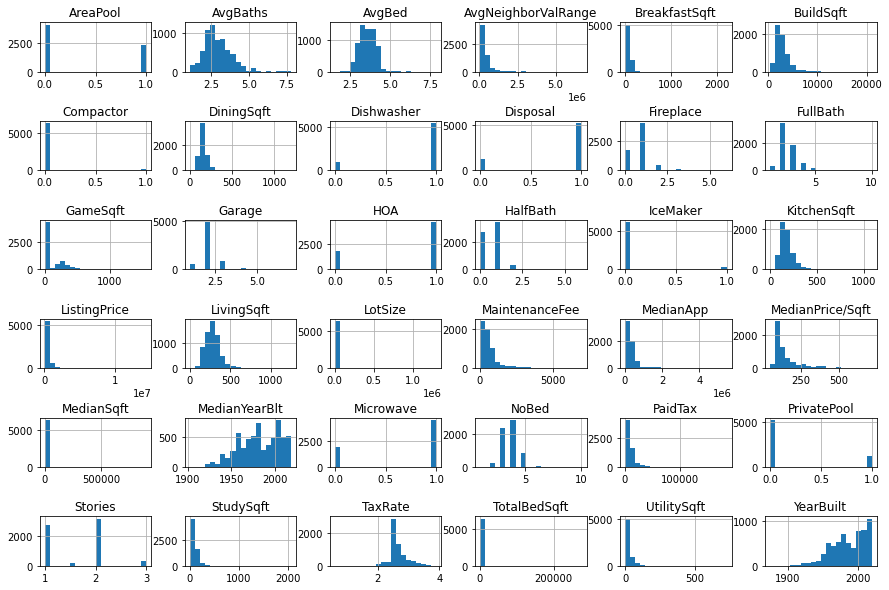

In [26]:
SingleFamilyHome.hist(figsize=(15,10),bins=20)
plt.subplots_adjust(hspace=1)

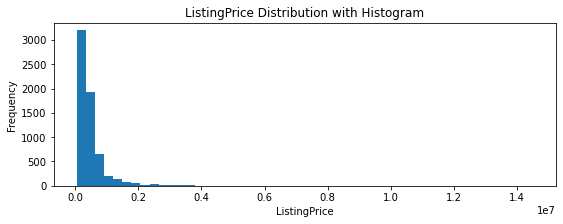

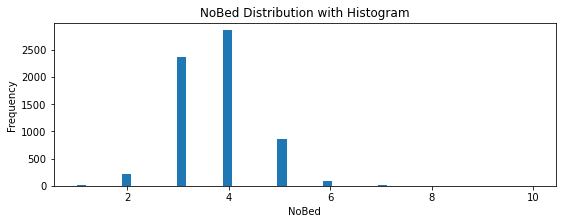

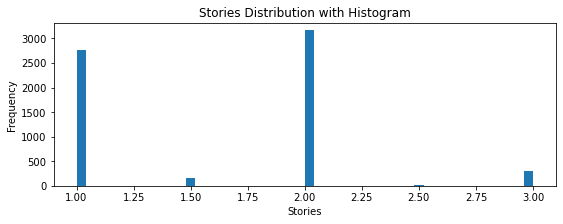

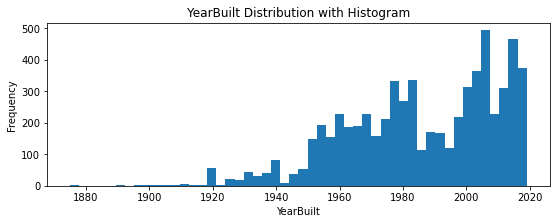

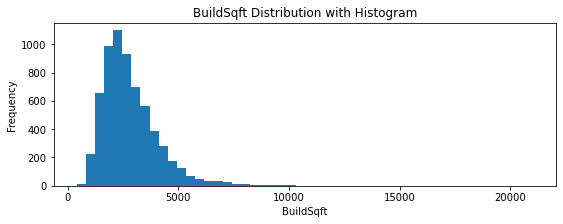

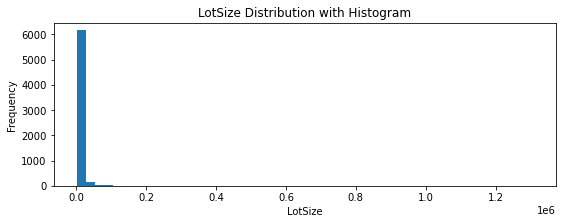

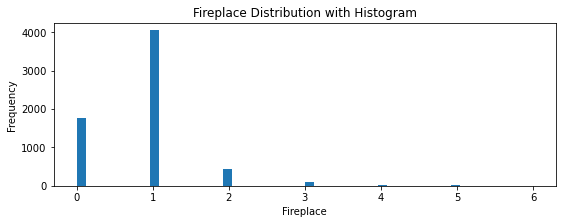

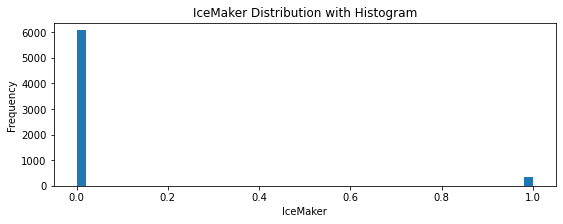

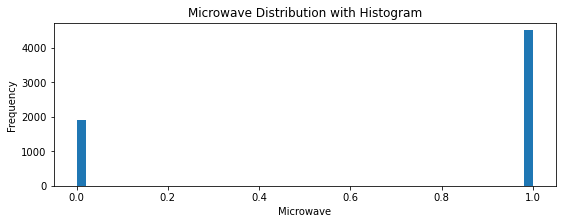

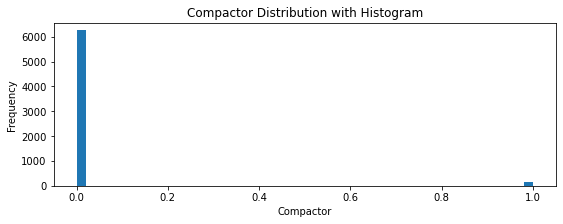

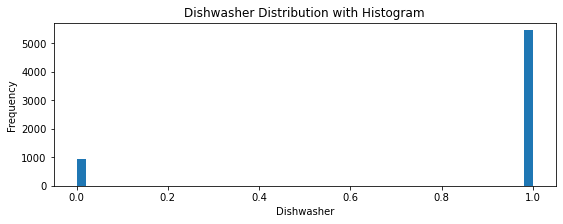

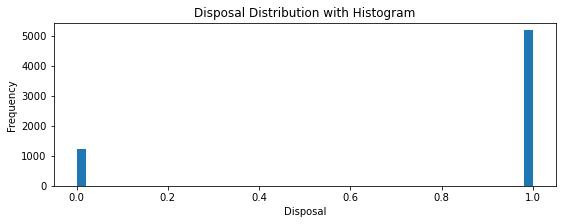

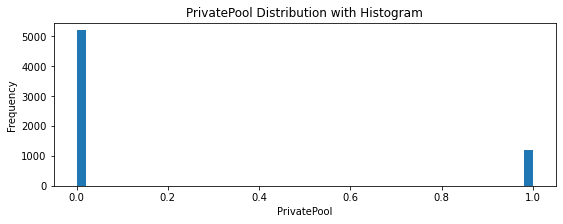

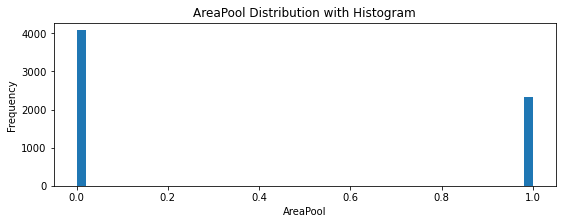

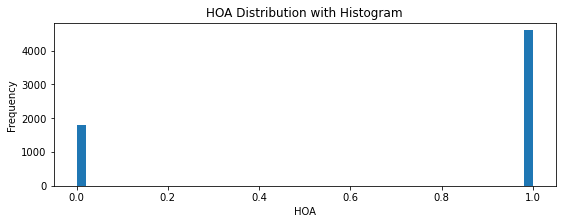

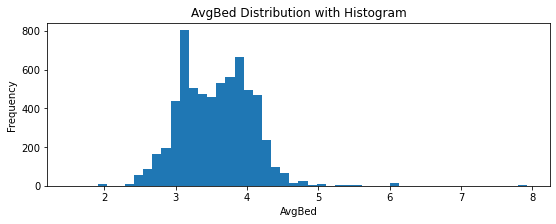

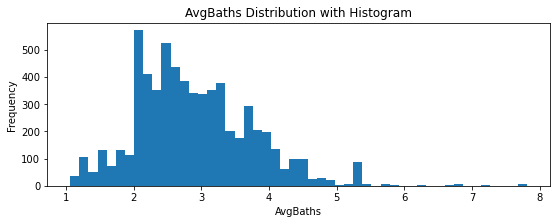

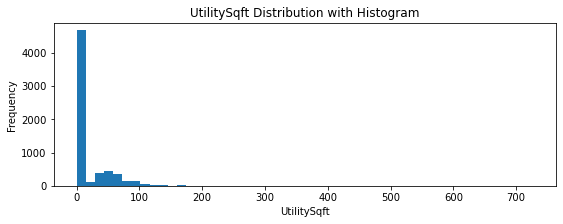

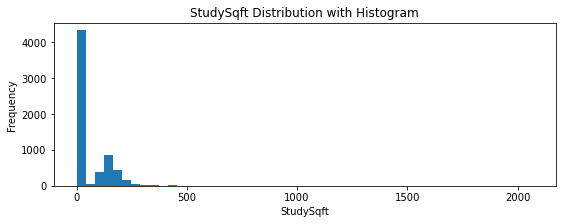

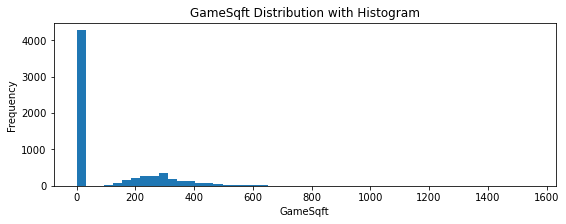

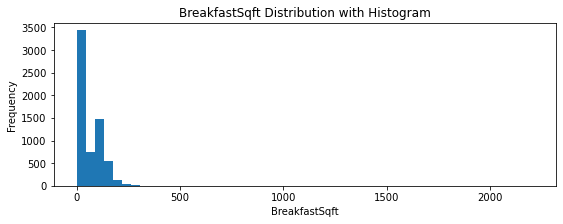

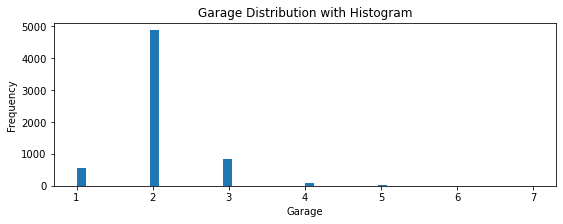

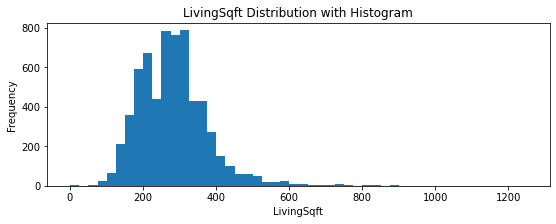

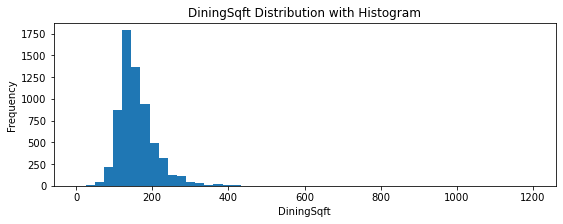

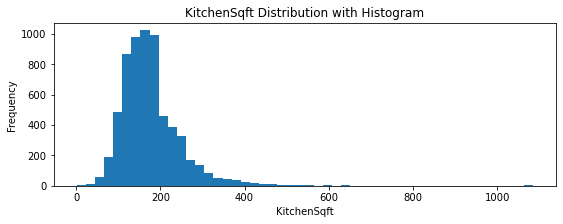

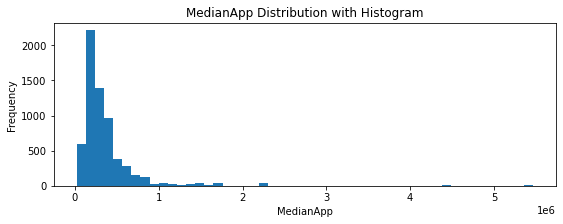

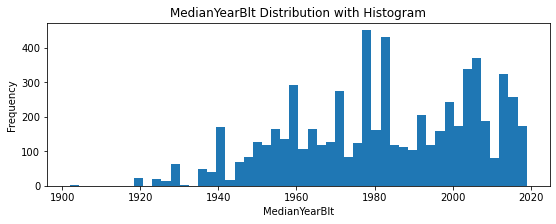

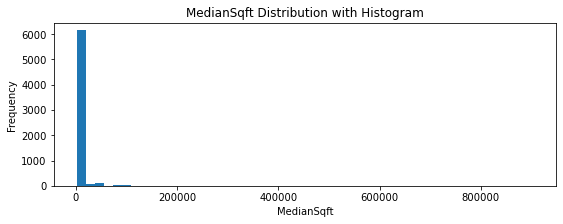

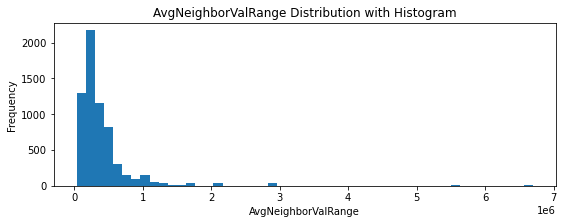

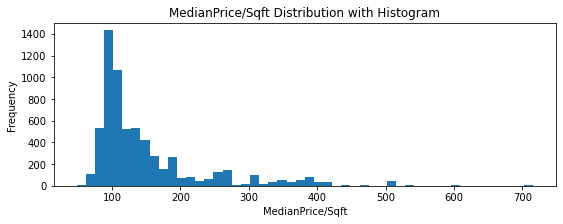

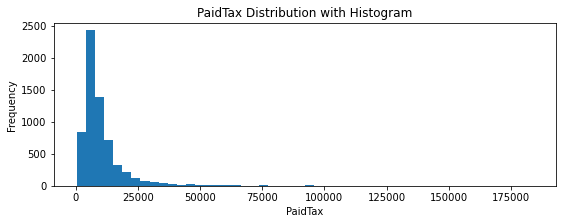

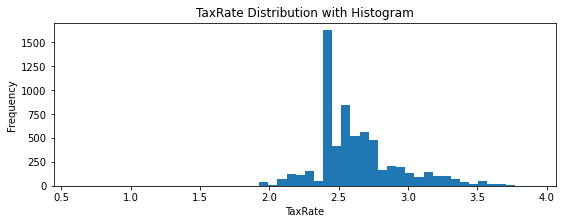

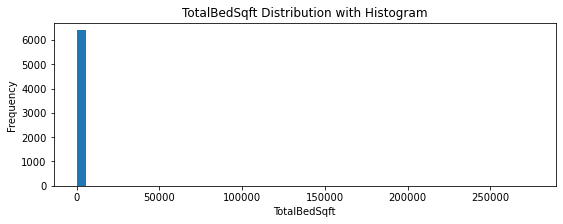

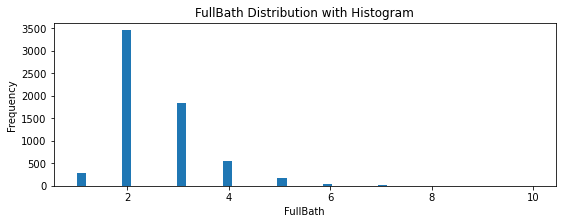

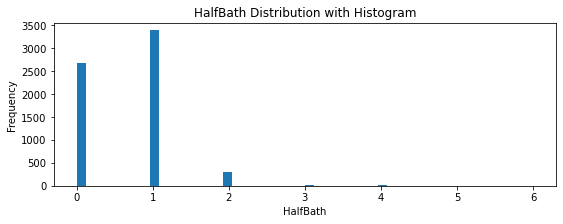

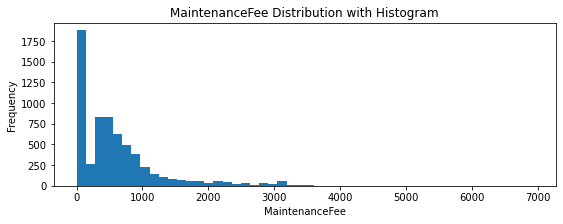

In [27]:
def plot_hist(variable):
    """This function craets histogram for passed in variabled"""
    plt.figure(figsize=(9,3))
    plt.hist(SingleFamilyHome[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()
for i in numerical:
    plot_hist(i)

### 2.5.2 Year Built and Median Year Built<a id='2.5.2_Year_Built_and_Median_Year_Built'></a>

In [28]:
SingleFamilyHome.YearBuilt.describe()

count    6396.000000
mean     1985.769856
std        24.014816
min      1875.000000
25%      1969.000000
50%      1988.000000
75%      2006.000000
max      2019.000000
Name: YearBuilt, dtype: float64

In [29]:
SingleFamilyHome.MedianYearBlt.describe()

count    6396.000000
mean     1982.342558
std        23.313791
min      1902.000000
25%      1965.000000
50%      1982.000000
75%      2003.000000
max      2019.000000
Name: MedianYearBlt, dtype: float64

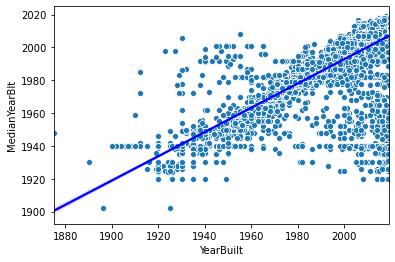

In [30]:
sns.scatterplot(x='YearBuilt', y='MedianYearBlt', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='YearBuilt', y='MedianYearBlt', data=SingleFamilyHome, scatter=False, color='b')

It would be easier to transfer year built of the house to age:

In [31]:
SingleFamilyHome['Age'] = date.today().year - SingleFamilyHome['YearBuilt']
SingleFamilyHome['MedianAge'] = date.today().year - SingleFamilyHome['MedianYearBlt']

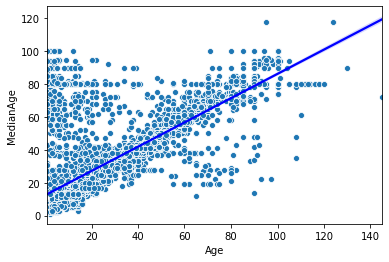

In [32]:
sns.scatterplot(x='Age', y='MedianAge', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='Age', y='MedianAge', data=SingleFamilyHome, scatter=False, color='b')

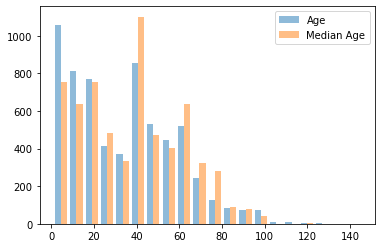

In [33]:
plt.hist([SingleFamilyHome.Age,SingleFamilyHome.MedianAge], bins=20, alpha=0.5, label=['Age','Median Age'])
plt.legend(loc='upper right')
plt.show()

In [34]:
# Drop YearBuilt and MedianYearBlt columns
SingleFamilyHome.drop(['YearBuilt','MedianYearBlt'],axis=1, inplace=True)

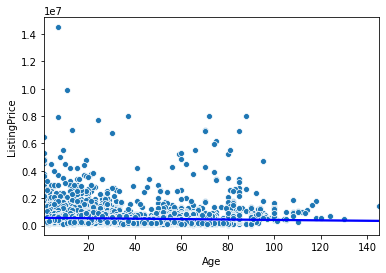

In [35]:
sns.scatterplot(x='Age', y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='Age', y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')

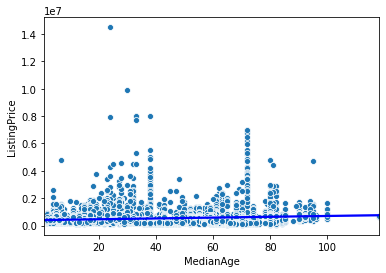

In [36]:
sns.scatterplot(x='MedianAge', y='ListingPrice', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='MedianAge', y='ListingPrice', data=SingleFamilyHome, scatter=False, color='b')

There is a small positive correlation between Median Age and house price which means for those subdivisions that have high median age the price is going up. This is happen because for those old subdivisions majority of house price comes from high lot price in these areas.

Text(0.5, 1.0, 'Scatter Plot for Listing Price vs Year Biult')

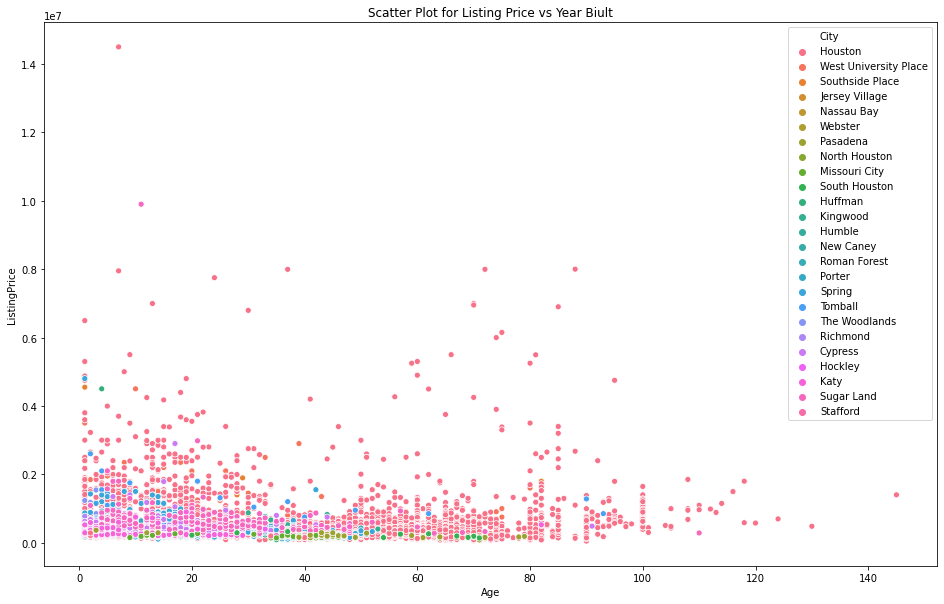

In [37]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='Age', y='ListingPrice', data=SingleFamilyHome,hue='City')
plt.title('Scatter Plot for Listing Price vs Year Biult')

### 2.4.2 Building Sqft<a id='2.4.2_Building_Sqft'></a>

In [38]:
SingleFamilyHome.BuildSqft.describe()

count     6396.000000
mean      2827.742339
std       1335.008648
min        400.000000
25%       1936.000000
50%       2552.000000
75%       3415.250000
max      21032.000000
Name: BuildSqft, dtype: float64

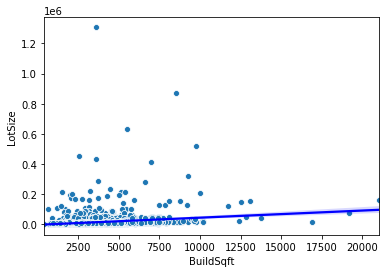

In [39]:
sns.scatterplot(x='BuildSqft', y='LotSize', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='LotSize', data=SingleFamilyHome, scatter=False, color='b')

In [40]:
SingleFamilyHome[SingleFamilyHome.BuildSqft > SingleFamilyHome.LotSize][['Address','BuildSqft','LotSize']]

,Address,BuildSqft,LotSize
0,1735 Eado Point Lane,1736,1428.0
1,619 Live Oak Street,2671,2006.0
5,602 Nagle Street,2392,2048.0
6,2618 Texas Street,2224,1464.0
14,2708 EaDo Grove Lane,2162,1435.0
...,...,...,...
4253,2617 Newman Street,3539,2500.0
4270,2714 Newman Street,4262,3500.0
4272,2624 Greenbriar Drive,3198,2500.0
4599,2849 Kings Retreat Circle,2783,1855.0


There are 206 houses where the building Sqft is higher than lot size. If we look at those houses in HAR.com it seems these houses do not have front yard and back yard that is why the building Sqft is higher than lot size.

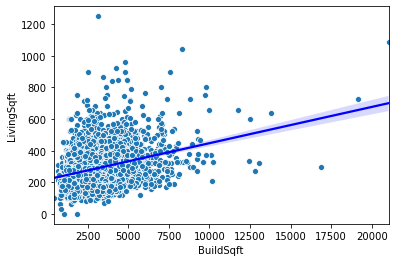

In [41]:
sns.scatterplot(x='BuildSqft', y='LivingSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='LivingSqft', data=SingleFamilyHome, scatter=False, color='b')

There are some outliers but there is no house with living area higher than building Sqft so let leave them for now.

In [42]:
SingleFamilyHome[SingleFamilyHome.LivingSqft > SingleFamilyHome.BuildSqft][['Address','BuildSqft','LivingSqft']]

,Address,BuildSqft,LivingSqft


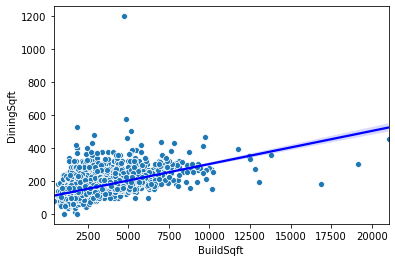

In [43]:
sns.scatterplot(x='BuildSqft', y='DiningSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='DiningSqft', data=SingleFamilyHome, scatter=False, color='b')

In [44]:
SingleFamilyHome[SingleFamilyHome.DiningSqft>400][['Address','BuildSqft','DiningSqft','LivingSqft']]

,Address,BuildSqft,DiningSqft,LivingSqft
103,2616 Quenby Avenue,5775,420.0,440.00
1066,3429 Ella Lee Lane,4741,1200.0,551.00
1356,9302 Sharpcrest Street,1780,420.0,120.00
1585,6 W Rivercrest Drive,21032,456.0,1088.00
1610,10219 Cedar Creek Drive,2765,432.0,317.25
1862,5360 Spring Park Street,5140,504.0,285.00
1925,5514 Russett Drive,9598,414.0,326.50
2011,6063 Crab Orchard Road,7843,432.0,540.00
2012,5737 Bayou Glen Road,7022,440.0,440.00
2849,9303 Bintliff Drive,1837,528.0,221.00


for 3429 Ella Lee Lane having 1200 sqft dining does not make sense , after I checked HAR.com I realized owner/agent entered 2 duplicated dimension for dining which I think it should be 600 sqft. and there is typo mistake for 1319 Mission Chase Drive.

In [45]:
SingleFamilyHome.loc[1066,'DiningSqft'] = 600
SingleFamilyHome.loc[1862,'DiningSqft'] = 252
SingleFamilyHome.loc[5765,'DiningSqft'] = 288

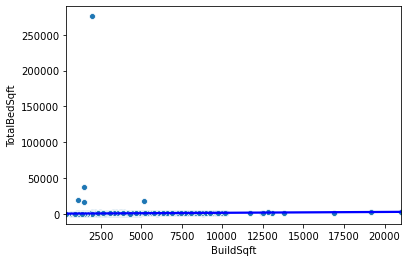

In [46]:
sns.scatterplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, scatter=False, color='b')

In [47]:
SingleFamilyHome[SingleFamilyHome.TotalBedSqft>2000][['Address','BuildSqft','TotalBedSqft']]

,Address,BuildSqft,TotalBedSqft
381,515 W 14th Street,1135,19984.027778
1155,5926 Southville Street,1478,37900.861111
1258,4814 Warm Springs Road,2132,2165.000000
1585,6 W Rivercrest Drive,21032,3235.000000
1594,10043 Cedar Creek Drive,3935,2056.000000
2250,3211 Ann Arbor Drive,3469,2092.000000
2258,7509 Middlewood Street,1986,2340.000000
2284,11102 Maynard Place,5208,17775.000000
2708,7607 Bankside Drive,3691,2164.000000
3723,1802 Castlerock Drive,12821,2571.466667


In [48]:
SingleFamilyHome.loc[381,'TotalBedSqft'] = 290
SingleFamilyHome.loc[1155,'TotalBedSqft'] = 668
SingleFamilyHome.loc[1258,'TotalBedSqft'] = 751
SingleFamilyHome.loc[2258,'TotalBedSqft'] = 750
SingleFamilyHome.loc[2284,'TotalBedSqft'] = 1747
SingleFamilyHome.loc[3787,'TotalBedSqft'] = 703
SingleFamilyHome.loc[5490,'TotalBedSqft'] = 365.25
SingleFamilyHome.loc[5708,'TotalBedSqft'] = 648
SingleFamilyHome.loc[5817,'TotalBedSqft'] = 642

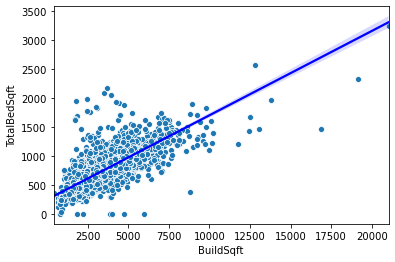

In [49]:
sns.scatterplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, scatter=False, color='b')

In [50]:
SingleFamilyHome[SingleFamilyHome.TotalBedSqft>SingleFamilyHome.BuildSqft][['Address','BuildSqft','TotalBedSqft']]

,Address,BuildSqft,TotalBedSqft
6280,6823 Trigate Drive,1796,1940.166667


In [51]:
SingleFamilyHome.loc[6280,'TotalBedSqft'] = 496

In [52]:
SingleFamilyHome[(SingleFamilyHome.TotalBedSqft+SingleFamilyHome.LivingSqft)>SingleFamilyHome.BuildSqft][['Address','BuildSqft','LivingSqft','TotalBedSqft']]

,Address,BuildSqft,LivingSqft,TotalBedSqft
3409,14955 Atmore Place Drive,1808,252.0,1691.0
3688,2317 Hampton Street,1703,198.0,1632.0
3704,8714 Prairie View Drive,400,100.0,364.0
4146,10819 Oasis Drive,1713,264.0,1621.0


In [53]:
SingleFamilyHome.loc[3409,'TotalBedSqft'] = 491
SingleFamilyHome.loc[3688,'TotalBedSqft'] = 432
SingleFamilyHome.loc[3704,'TotalBedSqft'] = 100
SingleFamilyHome.loc[4146,'TotalBedSqft'] = 253

In [54]:
SingleFamilyHome[(SingleFamilyHome.TotalBedSqft+SingleFamilyHome.LivingSqft+SingleFamilyHome.DiningSqft)>SingleFamilyHome.BuildSqft][['Address','BuildSqft','LivingSqft','DiningSqft','TotalBedSqft']]

,Address,BuildSqft,LivingSqft,DiningSqft,TotalBedSqft
799,4515 Rawley Street,680,308.0,110.0,276.000000
1135,9519 W Airport Boulevard,1845,750.0,400.0,707.000000
1729,3459 Angel Lane,1050,448.0,95.5,602.000000
4365,1111 Lisa Lane,2451,240.0,228.8,1982.352583


In [55]:
SingleFamilyHome.loc[4365,'TotalBedSqft'] = 649.3

In [56]:
SingleFamilyHome[(SingleFamilyHome.TotalBedSqft+SingleFamilyHome.LivingSqft+SingleFamilyHome.DiningSqft+SingleFamilyHome.KitchenSqft)>SingleFamilyHome.BuildSqft][['Address','BuildSqft','LivingSqft','KitchenSqft','DiningSqft','TotalBedSqft']]

,Address,BuildSqft,LivingSqft,KitchenSqft,DiningSqft,TotalBedSqft
285,329 E 25th Street A,1106,300.000000,194.000,174.000000,495.000000
429,809 Carl Street,814,247.000000,187.000,130.000000,252.000000
442,910 Coronado Street,888,283.200000,196.000,160.000000,280.000000
499,707 E 28th Street,990,300.000000,194.000,174.000000,473.000000
567,3770 Lovers Wood Lane #606,651,275.000000,176.000,180.000000,121.000000
660,3720 Ella Boulevard,892,272.000000,169.000,156.000000,375.000000
799,4515 Rawley Street,680,308.000000,110.000,110.000000,276.000000
847,3507 Goodhope Street,1055,360.500000,156.000,100.000000,456.000000
866,7323 Farnsworth Street,1199,289.000000,160.000,189.000000,636.000000
872,709 E 40th Street,672,212.166667,144.000,143.000000,200.000000


In [57]:
row_index = SingleFamilyHome[(SingleFamilyHome.TotalBedSqft+SingleFamilyHome.LivingSqft+SingleFamilyHome.DiningSqft+SingleFamilyHome.KitchenSqft)>SingleFamilyHome.BuildSqft].index

In [58]:
SingleFamilyHome.drop(row_index, inplace = True) 

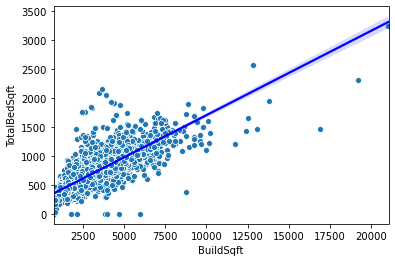

In [59]:
sns.scatterplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, palette='Blues_d')
sns.regplot(x='BuildSqft', y='TotalBedSqft', data=SingleFamilyHome, scatter=False, color='b')

In [60]:
SingleFamilyHome[SingleFamilyHome.image_link.map(len)<10]

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee,Age,MedianAge
419,[],419990,709 Moody Street,Houston,77009,Harris County,LTS 47 & 48 BLK 26 LINDALE PARK SEC 3,4,1.0,Traditional,...,272500.0,229.64,7220.00,2.42160,484.0,2,0,0.0,79,80
520,[],299000,203 LOCKWOOD Drive,Houston,77011,Harris County,Oak Lawn TR 3 Blk 18,5,2.0,Traditional,...,151000.0,154.91,3936.75,2.59344,796.0,2,0,0.0,101,84
576,[],187750,7710 Parker Road,Houston,77016,Harris County,LT 28 BLK 12 SCENIC WOODS,4,2.0,Traditional,...,76500.0,79.09,4586.00,2.42160,720.0,3,0,0.0,19,60
832,[],100000,4336 Dreyfus Street,Houston,77021,Harris County,LT 26 BLK 57 FOSTER PLACE,2,1.0,Traditional,...,63500.0,118.18,1269.00,2.42160,288.0,1,0,0.0,65,71
1172,[],150000,5619 Lyndhurst Drive,Houston,77033,Harris County,LT 21 BLK 7 EDGEWOOD SEC 1,2,1.0,Traditional,...,59500.0,70.60,1202.00,2.42160,346.0,1,0,0.0,72,68
1268,[],214000,4606 Omeara Drive,Houston,77035,Harris County,LT 16 BLK 25 WILLOW MEADOWS SEC 8,4,1.0,Traditional,...,389500.0,159.74,7479.00,2.42160,808.0,2,0,360.0,63,63
1757,[],170000,1739 Nichole Woods Drive,Houston,77047,Harris County,LT 25 BLK 1 CITY PARK SEC 5,3,2.0,Traditional,...,153000.0,110.70,4851.00,3.12160,353.0,2,1,700.0,7,14
2323,[],184000,7607 Round Bank Drive,Houston,77064,Harris County,LT 10 BLK 4 WESTBANK SEC 2,4,2.0,Traditional,...,129500.0,96.22,4787.00,2.67430,759.0,3,1,350.0,42,42
2662,[],224900,11719 Moorcreek Drive,Houston,77070,Harris County,LT 33 BLK 12 LAKEWOOD FOREST SEC 1,4,2.0,Traditional,...,266500.0,89.06,4636.00,2.47920,705.0,2,1,530.0,45,41
4038,[],192900,16326 Summer Dew Lane,Houston,77095,Harris County,LT 10 BLK 3 SOMMERALL SEC 1,3,1.0,Traditional,...,141500.0,100.81,4264.00,2.70430,456.0,2,0,0.0,36,36


In [61]:
no_image_index = SingleFamilyHome[SingleFamilyHome.image_link.map(len)<10].index

In [62]:
SingleFamilyHome.drop(no_image_index, inplace = True) 

In [63]:
SingleFamilyHome.reset_index(drop=True)

,image_link,ListingPrice,Address,City,ZipCode,County,Legal,NoBed,Stories,Style,...,AvgNeighborValRange,MedianPrice/Sqft,PaidTax,TaxRate,TotalBedSqft,FullBath,HalfBath,MaintenanceFee,Age,MedianAge
0,['https://photos.harstatic.com/189115929/hr/im...,364990,1735 Eado Point Lane,Houston,77003,Harris County,LT 17 BLK 2 EADO POINT,3,3.0,Contemporary/Modern,...,217000.0,192.51,2169.0,2.6554,430.000000,3,1,1195.0,1,2
1,['https://photos.harstatic.com/188179029/hr/im...,419000,619 Live Oak Street,Houston,77003,Harris County,LT 7 BLK 1 CAPITOL OAKS SEC 3 RP NO 1,3,3.0,Traditional,...,443500.0,200.05,10366.0,2.5466,320.000000,3,1,2244.0,10,8
2,['https://photos.harstatic.com/189527871/hr/im...,298800,1417 Hussion Street,Houston,77003,Harris County,LT 7 BLK 1 W L EDMUNDSON SEC 3,3,1.0,Traditional,...,126500.0,147.06,5854.0,2.5716,616.000000,1,1,0.0,14,91
3,['https://photos.harstatic.com/189915458/hr/im...,289900,1737 Aden Drive,Houston,77003,Harris County,"Lot 59, Block 1",2,2.0,Other,...,259000.0,181.62,6685.4,2.5465,330.000000,2,0,1500.0,14,15
4,['https://photos.harstatic.com/190529396/hr/im...,284900,1773 Aden Drive,Houston,77003,Harris County,LT 90 BLK 1 MIDTOWN VILLAGE,2,2.0,Traditional,...,259000.0,181.62,6299.0,2.5466,282.000000,2,1,1400.0,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6343,['https://photos.harstatic.com/190401279/hr/im...,167000,712 Minnesota Street,South Houston,77587,Harris County,LT 6 BLK 128 SOUTH HOUSTON,3,1.0,Traditional,...,103500.0,92.11,3108.0,2.8732,459.000000,1,1,0.0,54,57
6344,['https://photos.harstatic.com/190177640/hr/im...,155000,705 Washington Street,South Houston,77587,Harris County,LT 14 BLK 123 SOUTH HOUSTON,2,1.0,Traditional,...,103500.0,92.11,2735.0,2.8732,242.916667,1,0,0.0,69,57
6345,['https://photos.harstatic.com/185000920/hr/im...,149995,608 Wisconsin Street,South Houston,77587,Harris County,LT 4 BLK 137 SOUTH HOUSTON,4,1.0,Traditional,...,103500.0,92.11,2909.0,2.8732,441.000000,2,0,0.0,54,57
6346,['https://photos.harstatic.com/190869900/hr/im...,137500,407 Lynn Street,South Houston,77587,Harris County,LT 13 MERILYN PLACE SEC 2,3,1.0,Traditional,...,83500.0,118.87,2484.0,2.8732,383.000000,2,0,0.0,71,70


In [64]:
SingleFamilyHome.to_csv('../data/processed/SingleFamilyFinal.csv',index=False)

In [65]:
arr = os.listdir('../data/raw/Image_old/')

In [66]:
len(arr)

207172

In [67]:
index_list =[]
for name in arr:
    index_list.append(int(name.split('_')[0]))

In [68]:
len(set(index_list))

6379

In [69]:
data = pd.read_csv('../data/processed/SingleFamily.csv')

In [70]:
image =  set((index_list))

In [71]:
data_index = set(data.index)

In [72]:
data_index.difference(image)

{419,
 520,
 576,
 799,
 832,
 1172,
 1268,
 1757,
 2323,
 2662,
 4038,
 4391,
 4427,
 5449,
 6299,
 6371,
 6373}